# Практическая работа №5
### Выполнила студентка группы БВТ2101 Пьянова Анна Олеговна

Необходимо в зависимости от варианта сгенерировать датасет и сохранить его в формате csv.

Построить модель, которая будет содержать в себе автокодировщик и регрессионную модель. Схематично это должно выглядеть следующим образом: входные данные -> скрытые слои -> закодированные данные -> скрытые слои -> результат регрессии; входные данные -> скрытые слои -> закодированные данные -> скрытые слои -> декодированные данные.


Обучить модель и разбить обученную модель на 3: Модель кодирования данных (Входные данные -> Закодированные данные), модель декодирования данных (Закодированные данные -> Декодированные данные), и регрессионную модель (Входные данные -> Результат регрессии).


В качестве результата представить исходный код, сгенерированные данные в формате csv, кодированные и декодированные данные в формате csv, результат регрессии в формате csv (что должно быть и что выдает модель), и сами 3 модели в формате h5.

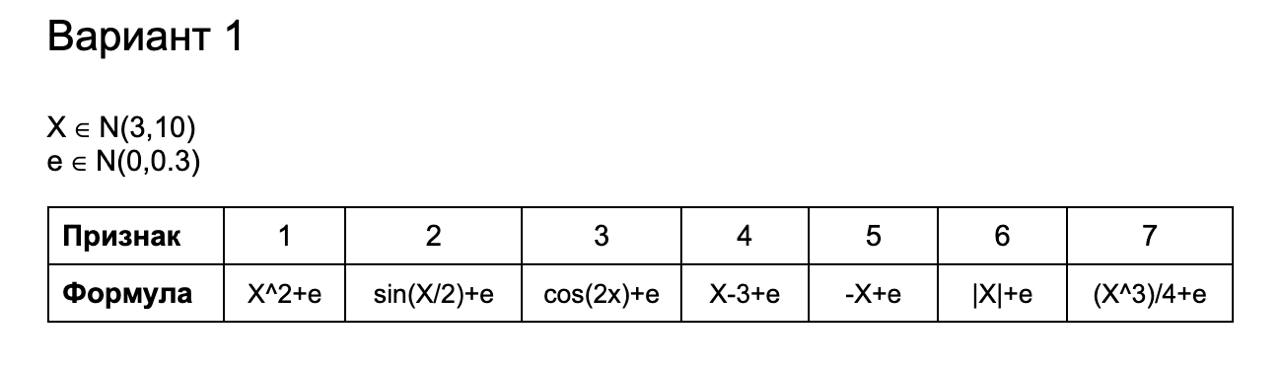

Цель регрессии: 14 % 7 + 1 = 1

### Выполнение работы

In [4]:
import numpy as np
import pandas as pd
from keras.models import Model
from keras.layers import Input, Dense

Генерация данных

In [5]:
mean_X = 3
std_X = 10
mean_e = 0
std_e = 0.3

X = np.random.normal(mean_X, std_X, 1000)
e = np.random.normal(mean_e, std_e, 1000)

feature1 = X**2 + e
feature2 = np.sin(X / 2) + e
feature3 = np.cos(2 * X) + e
feature4 = X - 3 + e
feature5 = -X + e
feature6 = np.abs(X) + e
feature7 = (X**3) / 4 + e

target = (14 % 7 + 1) * np.ones(1000)

data = pd.DataFrame({
    'feature1': feature1,
    'feature2': feature2,
    'feature3': feature3,
    'feature4': feature4,
    'feature5': feature5,
    'feature6': feature6,
    'feature7': feature7,
    'target': target
})

data.to_csv('data.csv', index=False)

In [6]:
input_data = Input(shape=(7,))

coded = Dense(64, activation='relu')(input_data)
coded = Dense(32, activation='relu')(coded)
coded = Dense(16, activation='relu')(coded)

decoded = Dense(32, activation='relu')(coded)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(7, activation='sigmoid')(decoded)

regression_output = Dense(1, activation='linear')(coded)
regression_model = Model(input_data, regression_output)

autocoded = Model(input_data, decoded)

autocoded.compile(optimizer='adam', loss='mse')
regression_model.compile(optimizer='adam', loss='mse')

autocoded.fit(data[['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7']],
                data[['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7']],
                epochs=25, batch_size=32, validation_split=0.2)

regression_model.fit(data[['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7']],
                     data['target'],
                     epochs=25, batch_size=32, validation_split=0.2)

Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 109771.5234 - val_loss: 89606.0234
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 135569.4531 - val_loss: 89597.6562
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 172768.5625 - val_loss: 89597.2891
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 160514.6875 - val_loss: 89597.0391
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 166605.3750 - val_loss: 89596.9297
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 163055.5625 - val_loss: 89596.8906
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 136316.2500 - val_loss: 89596.8828
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 119114.7031 - val_loss: 89596.8516
Epoch 9/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 144948.8750 - val_loss: 89596.8281
Epoch 10/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 144617.5938 - val_loss: 89595.5312
Epoch 11/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 138230.859

In [7]:
coder_model = Model(input_data, coded)
decoder_input = Input(shape=(16,))
decoded_output = autocoded.layers[-3](decoder_input)
decoded_output = autocoded.layers[-2](decoded_output)
decoded_output = autocoded.layers[-1](decoded_output)
decoder_model = Model(decoder_input, decoded_output)

regression_model.save('regression_model.h5')
coder_model.save('coder_model.h5')
decoder_model.save('decoder_model.h5')

In [8]:
coded_data = coder_model.predict(data[['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7']])
decoded_data = decoder_model.predict(coded_data)

coded_df = pd.DataFrame(coded_data)
coded_df.to_csv('coded_data.csv', index=False)
decoded_df = pd.DataFrame(decoded_data, columns=['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7'])
decoded_df.to_csv('decoded_data.csv', index=False)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [9]:
regression_results = regression_model.predict(data[['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7']])

regression_results_df = pd.DataFrame({
    'expected_target': data['target'],
    'predicted_target': regression_results.flatten()
})

regression_results_df.to_csv('regression_results.csv', index=False)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
